# Task 3 :- IRIS FLOWER CLASSIFICATION

In [1]:
import numpy as np
import pandas as pd
import matplotlib.pyplot as plt
import seaborn as sns
import plotly.express as px

In [2]:
df = pd.read_csv('IRIS.csv')

In [3]:
df.head(10)

,sepal_length,sepal_width,petal_length,petal_width,species
0,5.1,3.5,1.4,0.2,Iris-setosa
1,4.9,3.0,1.4,0.2,Iris-setosa
2,4.7,3.2,1.3,0.2,Iris-setosa
3,4.6,3.1,1.5,0.2,Iris-setosa
4,5.0,3.6,1.4,0.2,Iris-setosa
5,5.4,3.9,1.7,0.4,Iris-setosa
6,4.6,3.4,1.4,0.3,Iris-setosa
7,5.0,3.4,1.5,0.2,Iris-setosa
8,4.4,2.9,1.4,0.2,Iris-setosa
9,4.9,3.1,1.5,0.1,Iris-setosa


In [4]:
df.shape

(150, 5)

In [5]:
df.isnull().sum()

sepal_length    0
sepal_width     0
petal_length    0
petal_width     0
species         0
dtype: int64

In [6]:
df.info()

<class 'pandas.core.frame.DataFrame'>
RangeIndex: 150 entries, 0 to 149
Data columns (total 5 columns):
 #   Column        Non-Null Count  Dtype  
---  ------        --------------  -----  
 0   sepal_length  150 non-null    float64
 1   sepal_width   150 non-null    float64
 2   petal_length  150 non-null    float64
 3   petal_width   150 non-null    float64
 4   species       150 non-null    object 
dtypes: float64(4), object(1)
memory usage: 6.0+ KB


In [7]:
df.describe()

,sepal_length,sepal_width,petal_length,petal_width
count,150.000000,150.000000,150.000000,150.000000
mean,5.843333,3.054000,3.758667,1.198667
std,0.828066,0.433594,1.764420,0.763161
min,4.300000,2.000000,1.000000,0.100000
25%,5.100000,2.800000,1.600000,0.300000
50%,5.800000,3.000000,4.350000,1.300000
75%,6.400000,3.300000,5.100000,1.800000
max,7.900000,4.400000,6.900000,2.500000


In [8]:
from sklearn.preprocessing import LabelEncoder

from pandas.core.dtypes.common import is_numeric_dtype

le =LabelEncoder()



In [9]:
for i in df.columns:
    if is_numeric_dtype(df[i]):
        continue
    else:
        df[i]=le.fit_transform(df[i])

In [10]:
df.info()

<class 'pandas.core.frame.DataFrame'>
RangeIndex: 150 entries, 0 to 149
Data columns (total 5 columns):
 #   Column        Non-Null Count  Dtype  
---  ------        --------------  -----  
 0   sepal_length  150 non-null    float64
 1   sepal_width   150 non-null    float64
 2   petal_length  150 non-null    float64
 3   petal_width   150 non-null    float64
 4   species       150 non-null    int64  
dtypes: float64(4), int64(1)
memory usage: 6.0 KB


# Data Pre-processing

C:\Users\ASUS\AppData\Local\Temp\ipykernel_17764\790075168.py:1: FutureWarning: 

Passing `palette` without assigning `hue` is deprecated and will be removed in v0.14.0. Assign the `x` variable to `hue` and set `legend=False` for the same effect.

  sns.countplot(x = 'species', data= df, palette= "Set2")


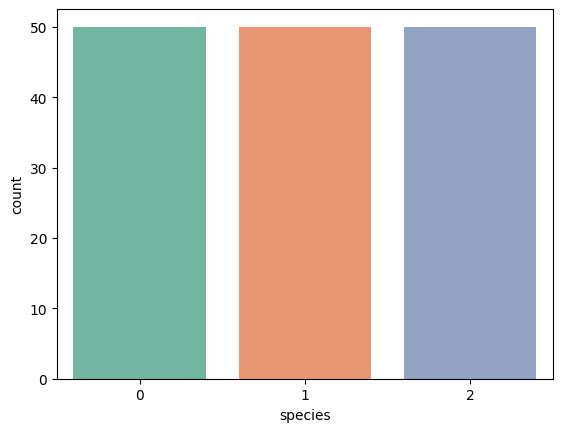

In [11]:
sns.countplot(x = 'species', data= df, palette= "Set2")
plt.show()

<Axes: xlabel='sepal_length', ylabel='Count'>

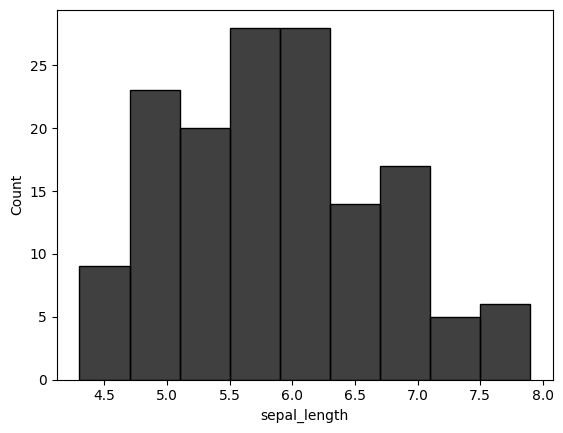

In [12]:
sns.histplot(data = df, x =df.sepal_length,color = 'black')

<Axes: xlabel='sepal_width', ylabel='Count'>

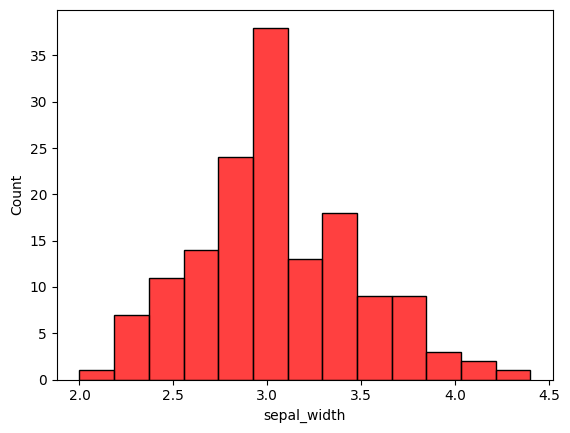

In [13]:
sns.histplot(data = df, x =df.sepal_width,color = 'red')

<Axes: xlabel='petal_length', ylabel='Count'>

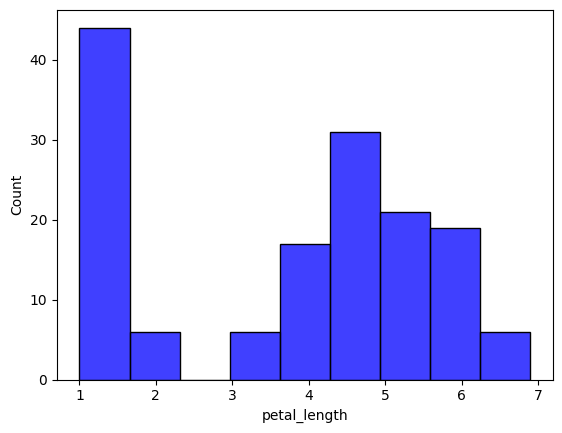

In [14]:
sns.histplot(data = df, x =df.petal_length,color = 'blue')

<Axes: xlabel='petal_width', ylabel='Count'>

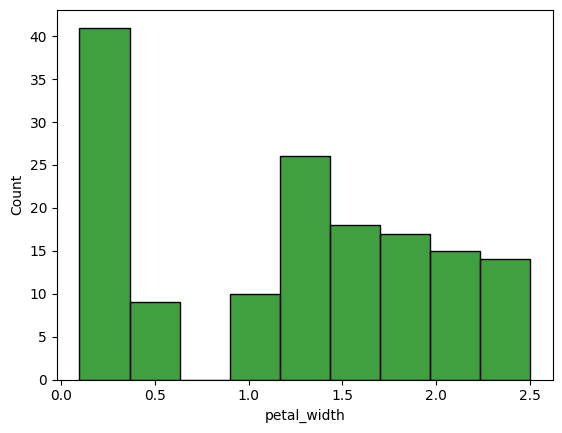

In [15]:
sns.histplot(data = df, x =df.petal_width,color = 'green')

<Axes: >

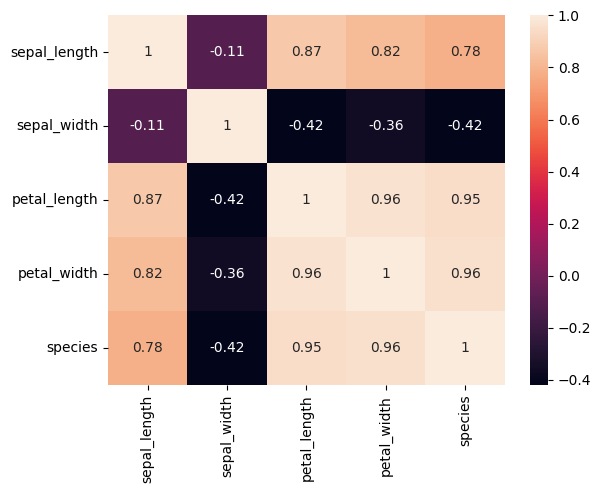

In [16]:
corr= df.corr()
sns.heatmap(corr, annot=True)

# Preparing Data

In [17]:
from sklearn.model_selection import train_test_split

In [18]:
df.columns

Index(['sepal_length', 'sepal_width', 'petal_length', 'petal_width',
       'species'],
      dtype='object')

In [19]:
x=df.drop(['species'], axis=1)
y=df.species

In [20]:
x_train, x_test, y_train, y_test= train_test_split(x,y,test_size=0.3)

# Building Model

In [21]:
from sklearn.linear_model import LogisticRegression

In [22]:
Model = LogisticRegression()
Model.fit(x_train,y_train)

,penalty,'l2'
,dual,False
,tol,0.0001
,C,1.0
,fit_intercept,True
,intercept_scaling,1
,class_weight,None
,random_state,None
,solver,'lbfgs'
,max_iter,100
,multi_class,'deprecated'


In [23]:
print("Score for Train data:", Model.score(x_train, y_train))
print("Score for Test data:", Model.score(x_test, y_test))

Score for Train data: 0.9714285714285714
Score for Test data: 0.9777777777777777


In [24]:
from sklearn.ensemble import RandomForestClassifier
Model2 = RandomForestClassifier(n_estimators = 300, random_state=100)
Model2.fit(x_train,y_train)

,n_estimators,300
,criterion,'gini'
,max_depth,None
,min_samples_split,2
,min_samples_leaf,1
,min_weight_fraction_leaf,0.0
,max_features,'sqrt'
,max_leaf_nodes,None
,min_impurity_decrease,0.0
,bootstrap,True
,oob_score,False


In [25]:
print("Score for Train data", Model2.score(x_train, y_train))
print("Score for Test data", Model2.score(x_test, y_test))

Score for Train data 1.0
Score for Test data 0.9555555555555556


In [26]:
from sklearn.neighbors import KNeighborsClassifier
Model3 = KNeighborsClassifier()
Model3.fit(x_train,y_train)

,n_neighbors,5
,weights,'uniform'
,algorithm,'auto'
,leaf_size,30
,p,2
,metric,'minkowski'
,metric_params,None
,n_jobs,None


In [27]:
print("Score for Train data:", Model3.score(x_train, y_train))
print("Score for Test data:", Model3.score(x_test, y_test))

Score for Train data: 0.9714285714285714
Score for Test data: 0.9555555555555556


# Testing Model

In [28]:
df.head(5)

,sepal_length,sepal_width,petal_length,petal_width,species
0,5.1,3.5,1.4,0.2,0
1,4.9,3.0,1.4,0.2,0
2,4.7,3.2,1.3,0.2,0
3,4.6,3.1,1.5,0.2,0
4,5.0,3.6,1.4,0.2,0


In [29]:
data = {'sepal_length': [5.2], 'sepal_width': [3.6], 'petal_length': [1.4], 'petal_width': [0.2]}
trail = pd.DataFrame(data)

In [30]:
result = Model.predict(trail)
print("Result Species:", result[0])

Result Species: 0
